<a href="https://colab.research.google.com/github/ucchol/Applied-Cognitive-Modeling-CS--5390/blob/main/cognitive_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyibl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random
import math
decay= 0.5
sigma= 0.25
n= random.random()

### **(20 Points) Question 1:** What is Activation in Instance Based Learning Theory (IBLT)? Explain all parts of the activation equation. Write a function to compute the Activation. 

Instance-Based Learning Theory (IBLT) is a Cognitive Modeling paradigm that focuses on the classification of new data points based on their similarity to existing data points. The core idea is that a new data point is classified based on the label of its closest neighbor(s) in the training set.

In IBLT, activation refers to the process of determining the degree to which a particular instance or data point in the training set is likely to contribute to the classification of a new data point. This is typically done by measuring the similarity between the new data point and each instance in the training set.

The activation function is a key component of IBLT. It is used to weight the contribution of each training instance to the classification of a new data point. The activation function typically assigns a weight or score to each instance based on its similarity to the new data point, and these weights are used to determine the final classification of the new data point.

Different activation functions can be used in IBLT, depending on the nature of the data and the specific classification task.

The IBL base activation equation is: 

- IBL base activation: $A_{i,k,t} = \ln \left( \sum\limits_{i=1}^{n} (t- t_{i})^{-d} \right) +\sigma*ln\left(\frac{1-\gamma_{i,k,t}}{\gamma_{i,k,t}} \right)$

The activation $A_{i}$ of a instance $i$ in declarative memory, $t$ represnts the current trial, $k$ represents the options, $d$ is the decay parameter and $\sigma$ represents the noise parameter.

The first part is known as the base activation part. Here, t is the current timestamp, t_{i} is the previous memories, d is decay(how much is stored in memory).
The second part is known as noise. The value of sigma here is 0.50, and we assume the value of gamma is random.

In [3]:
def base_activation(pres_times, memory):
    base_act = np.zeros(len(memory)) #initialize a long vector of 0s
    for position in range(len(memory)):
        past_pres_times = pres_times[pres_times < memory[position]]
        base_act[position] = np.sum(1/np.sqrt(memory[position] - past_pres_times))
    non_zero_activations = np.not_equal(base_act, 0) #since  log(0)  is undefined, we identify the non- 0  quantities in base_act
    base_act[non_zero_activations] = np.log(base_act[np.not_equal(base_act, 0)]) + sigma * np.log((1-n)/n) # setting up the equation
    
    return base_act

### **(20 Points) Question 2:** What is Probaility of Retrieval in IBLT? Write a function to compute the Probaility of Retrieval. 

The probability of retrieval is a measure of the likelihood that a stored instance in the training set will be selected as a nearest neighbor of a new data point. It depends on factors such as the density of instances in the training set, the dimensionality of the feature space, and the similarity metric used to measure distance between instances.

A high probability of retrieval means that the training set is dense in the feature space and that there are many instances that are similar to the new data point, which is desirable for accurate classification. A low probability of retrieval means that the training set is sparse in the feature space, and there are few instances that are similar to the new data point, which can result in classification errors.



The IBL Probability of Retrieval equation is: 

${P_{i,k,t}} = \frac{e^{A_{i,k,t}}/{\tau}}{\sum_{i=1}^{n} e^{A_{i,k,t}}/{\tau}}$

$τ$ is the temperature parameter which is $σ *\sqrt{2}$.

In [4]:
def probability(base_act):
  exponents = [] #vector to hold exponential values
  prob = [] #vector to hold probability of retrieval
  exp_sum = 0
  for value in base_act:
    exp_value = math.exp(value)/ sigma * np.sqrt(2)
    exponents.append(exp_value)
    exp_sum += exp_value
  for value in exponents:
    probability = value / exp_sum
    prob.append(probability)
  
  return prob

##**(20 Points) Question 3:** What are the Blended Values in IBLT? Write a function to compute the Blended Values of the different options. Consider that you have two options for this exercise. 

When a new data point is presented to an IBLT system, it is typically classified based on the label of its nearest neighbor in the training set. However, it is also possible to take into account the labels of multiple nearest neighbors and combine them in some way to make a more informed decision.

One approach to combining the classification decisions of multiple neighbors is to use a weighted sum of their labels, where the weights are based on their distance or similarity to the new data point. The idea is to give more weight to the labels of neighbors that are more similar to the new data point, and less weight to neighbors that are less similar.

Blended values can also be used to address the issue of ties, where multiple nearest neighbors have the same distance to the new data point. In this case, the blended values can be used to assign a label to the new data point by combining the labels of the tied neighbors.

The IBL Blending equation is: 

- $V_{k,t} = \sum_{i=1}^{n}{P_{i,k,t}}*X_{i,k,t}$

where $X$ is the outcome associated with each instance for option $k$.

In [23]:
def compute_blended_values(option1, option2):
    n = len(option1) # number of IBLT instances
    blended_values = {}
    for prob in option1[0]: # iterate over the probabilities from the previous code in the first IBLT instance
        prob_sum = 0
        for i in range(n):
            prob_k = option1[i].get(prob, 0) - option2[i].get(prob, 0)
            prob_sum += prob_k
        blended_values[prob] = prob_sum
    return blended_values

## **(20 Points) Question 4:** Consider the following example where participants are deciding bewteen "Safe" and "Risky" option. The following figure captures the memory screenshot at trial 11. Demonstrate the calculation of activation, probability of retrieval and blended values at trial 12. 

Note: Please check [PyIBL documentation](http://pyibl.ddmlab.com/#inspecting-the-model-s-internal-state-and-computations) for detailed catculation. 

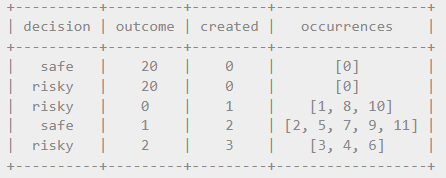

In [8]:
from pyibl import Agent

In [9]:
agent = Agent(default_utility=4.4, decay= 0.50, noise= 0.10)

In [10]:
options = ['A', 'B']    #A is the safe, and B is the risky option

In [11]:
choice = agent.choose(options)

In [14]:
#reward function

import random

def reward(choice):
  if choice == 'A':   #safe
    r =3
  elif random.random() <= 0.8:   #risky
    r=4
  else:
    r =0
  return r

In [15]:
print(choice)
r= reward(choice)
print(r)
agent.respond(r)

B
4


In [17]:
agent.trace = True

#agent chooses an option 

choice = agent.choose(options)
print(choice)
r = reward(choice)
print(r)
agent.respond(r)
agent.instances()


A → 3.0
+------+----------+---------+-------------+---------+-----------------+---------------------+---------------------+-----------------------+
|  id  | decision | created | occurrences | outcome | base activation |   activation noise  |   total activation  | retrieval probability |
+------+----------+---------+-------------+---------+-----------------+---------------------+---------------------+-----------------------+
| 0001 |    A     |    2    |     [2]     |    3    |       0.0       | 0.07537447586908495 | 0.07537447586908495 |          1.0          |
+------+----------+---------+-------------+---------+-----------------+---------------------+---------------------+-----------------------+

B → 4.0
+------+----------+---------+-------------+---------+---------------------+----------------------+---------------------+-----------------------+
|  id  | decision | created | occurrences | outcome |   base activation   |   activation noise   |   total activation  | retrieval probab

In [18]:
agent.reset

<bound method Agent.reset of <Agent agent-1 139727543213360>>

In [21]:
agent.trace = True

import time # to calculate time
runs = 20 # number of runs (participants)
trials = 12 # number of trials (episodes)
average_p = [] # to store average of performance (proportion of maximum reward expectation choice)
average_time = [] # to save time 
for r in range(runs): # Participants
  pmax = []
  ttime = [0]
  agent.reset() #clear the memory for a new run
  for i in range(trials):     
    start = time.time()
    choice = agent.choose(options) # choose one option from the list of two
    # determine the reward that agent can receive
    r = reward(choice)
    # store the instance
    agent.respond(r)
    end = time.time()
    ttime.append(ttime[-1]+ end - start)
    pmax.append(choice == 'B') 
  average_p.append(pmax) # save performance of each run 
  average_time.append(ttime) # save time of each run 


A → 4.4
+----+----------+---------+-------------+---------+-----------------+------------------+------------------+-----------------------+
| id | decision | created | occurrences | outcome | base activation | activation noise | total activation | retrieval probability |
+----+----------+---------+-------------+---------+-----------------+------------------+------------------+-----------------------+
+----+----------+---------+-------------+---------+-----------------+------------------+------------------+-----------------------+

B → 4.4
+----+----------+---------+-------------+---------+-----------------+------------------+------------------+-----------------------+
| id | decision | created | occurrences | outcome | base activation | activation noise | total activation | retrieval probability |
+----+----------+---------+-------------+---------+-----------------+------------------+------------------+-----------------------+
+----+----------+---------+-------------+---------+-------

# (20 Points) Question 5: Plot a line graph to display a) Activation, b) the Probability of Retrieval and c) the blended values.

Note: The x-axis will represent the trials and y-axis will represent one the dependent variable (activation, probability
of retrieval and blended value).

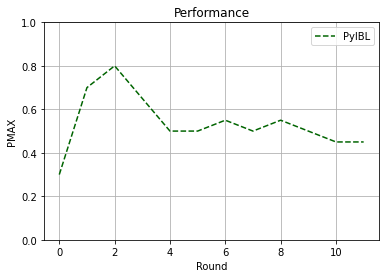

In [22]:
import matplotlib.pyplot as plt
import numpy as np 
plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), color='darkgreen', markersize=2, linestyle='--', label='PyIBL')
plt.xlabel('Round')
plt.ylabel('PMAX')
plt.title('Performance')
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()